# INSTAGRAM PERFORMANCE ANALYSIS

##  Project Objective

The main objectives of this project are:
- To understand the structure of the Instagram dataset
- To analyze engagement metrics such as likes, comments, shares, and saves
- To study how different content types affect performance
- To identify relationships between features and performance buckets


##  Import Required Libraries


In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##  Load the Dataset


In [205]:
df=pd.read_csv('Instagram_Dataset.csv')


In [206]:
df.head()

,post_id,account_id,account_type,follower_count,media_type,content_category,traffic_source,has_call_to_action,post_datetime,post_date,...,comments,shares,saves,reach,impressions,engagement_rate,followers_gained,caption_length,hashtags_count,performance_bucket_label
0,IG0000001,7.0,brand,3551.0,reel,Technology,Home Feed,1,2024-11-30 06:00:00,2024-11-30,...,5,7,34,4327,6230,0.0385,899,100,7,medium
1,IG0000002,20.0,creator,31095.0,image,Fitness,Hashtags,1,2025-08-15 15:00:00,2025-08-15,...,10,21,68,7451,8268,0.0663,805,122,5,viral
2,IG0000003,15.0,brand,8167.0,reel,Beauty,Reels Feed,0,2025-09-11 16:00:00,2025-09-11,...,2,1,22,1639,2616,0.0531,758,115,8,high
3,IG0000004,11.0,creator,9044.0,carousel,Music,External,0,2025-09-18 03:00:00,2025-09-18,...,0,7,0,2877,3171,0.0309,402,115,7,medium
4,IG0000005,8.0,creator,15986.0,reel,Technology,Profile,0,2025-03-21 09:00:00,2025-03-21,...,8,5,21,5350,8503,0.0221,155,112,9,low


##  Dataset Description

The dataset contains information related to Instagram posts including:
- Account details
- Post timing information
- Media and content types
- Engagement metrics
- Performance bucket labels

**Target Variable:** `performance_bucket_label`


##  Dataset Shape and Size


In [207]:
df.shape

(29999, 23)

In [208]:
df.size

689977

##  Column Names


In [209]:
df.columns

Index(['post_id', 'account_id', 'account_type', 'follower_count', 'media_type',
       'content_category', 'traffic_source', 'has_call_to_action',
       'post_datetime', 'post_date', 'post_hour', 'day_of_week', 'likes',
       'comments', 'shares', 'saves', 'reach', 'impressions',
       'engagement_rate', 'followers_gained', 'caption_length',
       'hashtags_count', 'performance_bucket_label'],
      dtype='object')

##  Dataset Information


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   post_id                   29799 non-null  object 
 1   account_id                29849 non-null  float64
 2   account_type              29899 non-null  object 
 3   follower_count            29949 non-null  float64
 4   media_type                29999 non-null  object 
 5   content_category          29999 non-null  object 
 6   traffic_source            29999 non-null  object 
 7   has_call_to_action        29999 non-null  int64  
 8   post_datetime             29999 non-null  object 
 9   post_date                 29999 non-null  object 
 10  post_hour                 29999 non-null  int64  
 11  day_of_week               29999 non-null  object 
 12  likes                     29999 non-null  int64  
 13  comments                  29999 non-null  int64  
 14  shares

##  Statistical Summary


In [211]:
df.describe()

,account_id,follower_count,has_call_to_action,post_hour,likes,comments,shares,saves,reach,impressions,engagement_rate,followers_gained,caption_length,hashtags_count
count,29849.000000,29949.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,10.569801,10281.218972,0.348778,11.499417,287.653588,8.521917,14.426614,42.517284,6272.475449,8466.952498,0.042107,502.152805,120.081169,7.987933
std,5.765244,6692.540738,0.476592,6.900587,317.647682,10.116505,16.420899,47.808844,4985.877059,6825.900355,0.024095,290.364038,11.009108,2.828130
min,1.000000,3083.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,268.000000,327.000000,0.000000,0.000000,70.000000,0.000000
25%,6.000000,5824.000000,0.000000,6.000000,104.000000,3.000000,5.000000,15.000000,3058.000000,4102.000000,0.024000,251.000000,113.000000,6.000000
50%,11.000000,9044.000000,0.000000,12.000000,199.000000,6.000000,10.000000,29.000000,4913.000000,6595.000000,0.040600,501.000000,120.000000,8.000000
75%,16.000000,10739.000000,1.000000,17.000000,363.000000,11.000000,19.000000,54.000000,7863.000000,10620.500000,0.057000,755.000000,127.000000,10.000000
max,20.000000,31095.000000,1.000000,23.000000,10632.000000,339.000000,516.000000,1542.000000,73339.000000,105203.000000,0.271000,1000.000000,166.000000,21.000000


##  Missing Value Analysis


In [212]:
df.isnull().sum()

post_id                     200
account_id                  150
account_type                100
follower_count               50
media_type                    0
content_category              0
traffic_source                0
has_call_to_action            0
post_datetime                 0
post_date                     0
post_hour                     0
day_of_week                   0
likes                         0
comments                      0
shares                        0
saves                         0
reach                         0
impressions                   0
engagement_rate               0
followers_gained              0
caption_length                0
hashtags_count                0
performance_bucket_label      0
dtype: int64

##  Handling Missing Values

- Filled missing categorical values using mode
- Filled missing numerical values using median


In [213]:
df['account_type']=df['account_type'].fillna(df['account_type'].mode()[0])
df['follower_count']=df['follower_count'].fillna(df['follower_count'].median())

In [214]:
df.isnull().sum()

post_id                     200
account_id                  150
account_type                  0
follower_count                0
media_type                    0
content_category              0
traffic_source                0
has_call_to_action            0
post_datetime                 0
post_date                     0
post_hour                     0
day_of_week                   0
likes                         0
comments                      0
shares                        0
saves                         0
reach                         0
impressions                   0
engagement_rate               0
followers_gained              0
caption_length                0
hashtags_count                0
performance_bucket_label      0
dtype: int64

##  Dropping Irrelevant Columns


In [215]:
df.drop(columns=['post_id','account_id','post_datetime', 'post_date',],axis=1,inplace=True)

## Outlier Detection


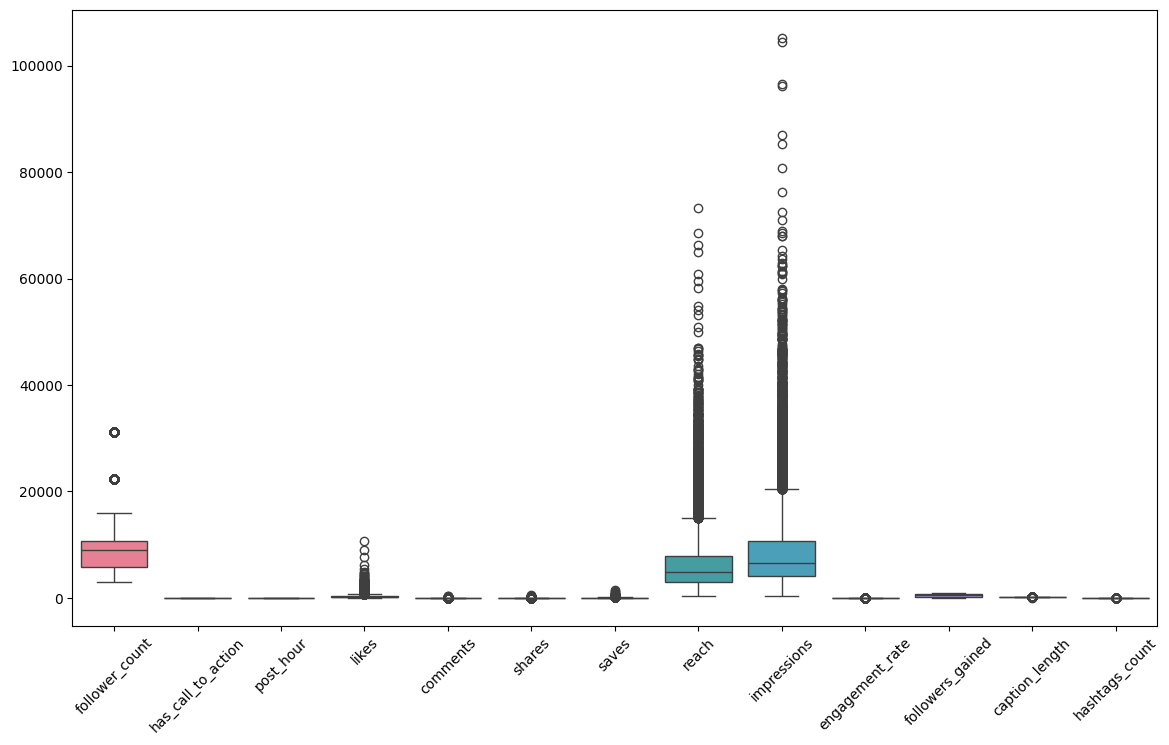

In [216]:
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

##  Correlation Analysis


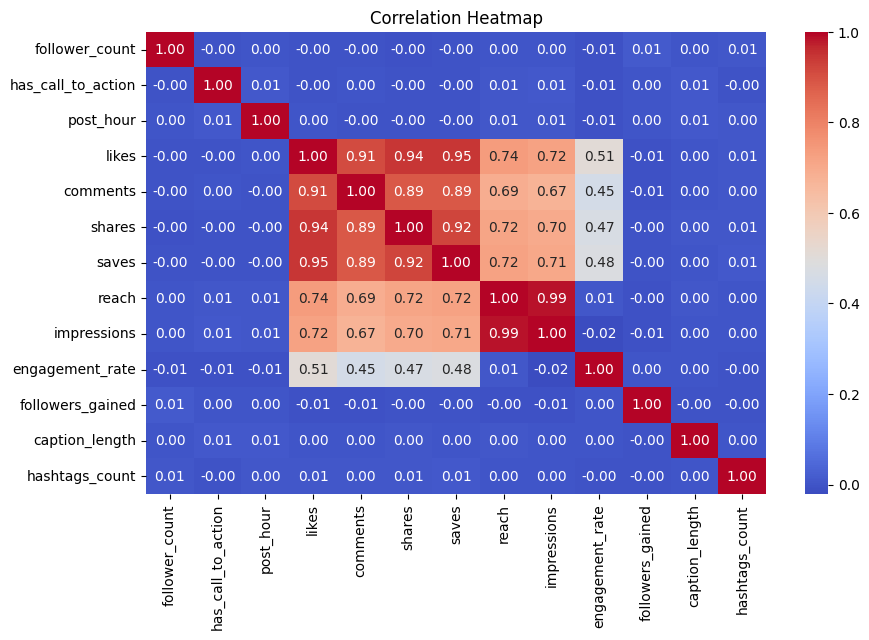

In [217]:


plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f",)
plt.title("Correlation Heatmap")
plt.show()


##  Univariate Analysis


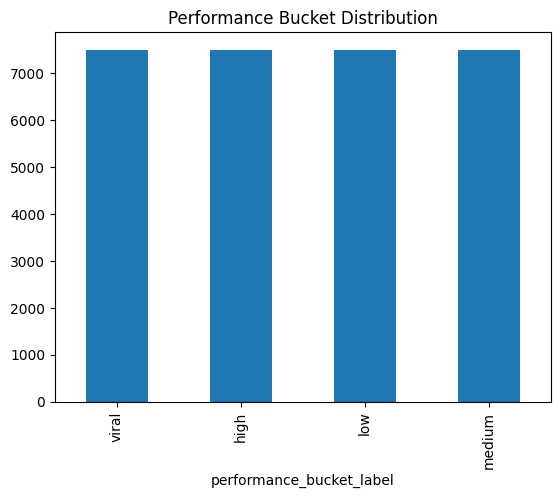

In [218]:
plt.figure()
df['performance_bucket_label'].value_counts().plot(kind='bar')
plt.title('Performance Bucket Distribution')
plt.show()


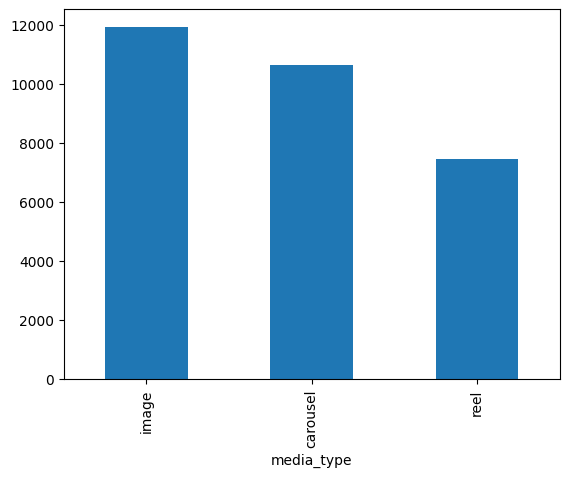

In [219]:
df['media_type'].value_counts().plot(kind='bar')
plt.show()


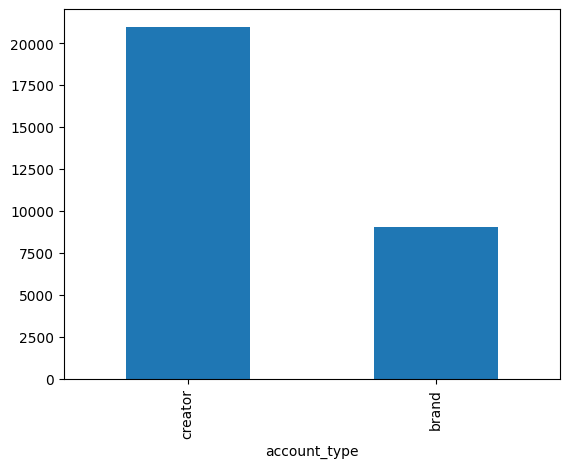

In [220]:

df['account_type'].value_counts().plot(kind='bar')
plt.show()


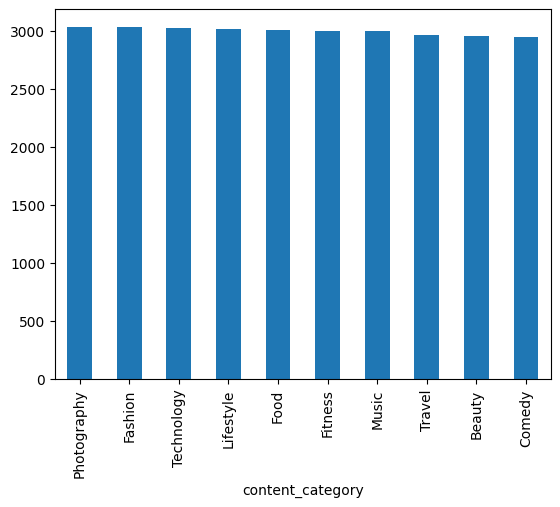

In [221]:

df['content_category'].value_counts().plot(kind='bar')
plt.show()

## Bivariate Analysis


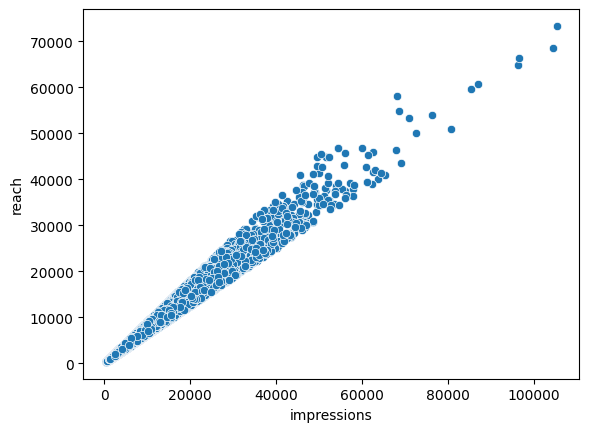

In [222]:
sns.scatterplot(data=df,x='impressions',y='reach')
plt.show()

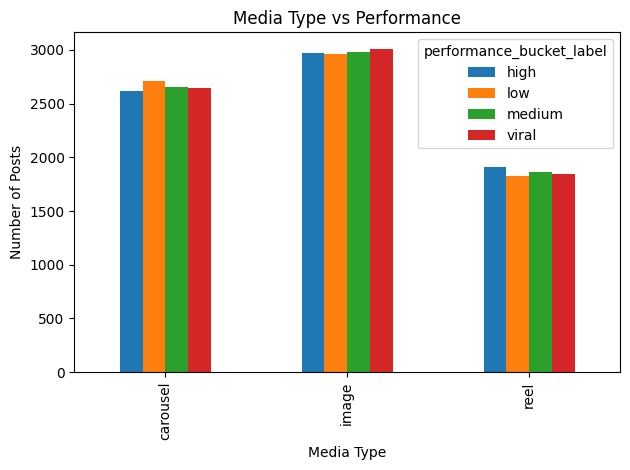

In [223]:

media_perf = pd.crosstab(
    df['media_type'],
    df['performance_bucket_label']
)

media_perf.plot(kind='bar')

plt.title("Media Type vs Performance")
plt.xlabel("Media Type")
plt.ylabel("Number of Posts")
plt.legend(title="performance_bucket_label")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

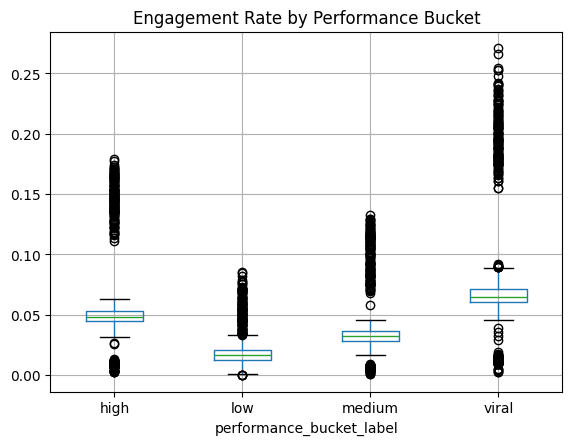

In [224]:
plt.figure()
df.boxplot(column='engagement_rate', by='performance_bucket_label')
plt.title('Engagement Rate by Performance Bucket')
plt.suptitle('')
plt.show()


<Figure size 640x480 with 0 Axes>

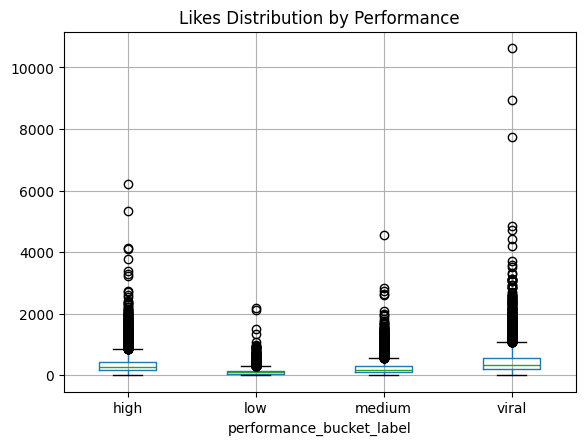

In [225]:
plt.figure()
df.boxplot(column='likes', by='performance_bucket_label')
plt.title('Likes Distribution by Performance')
plt.suptitle('')
plt.show()


##  Feature Engineering

Creating total engagement feature by combining likes, comments,
shares, and saves.


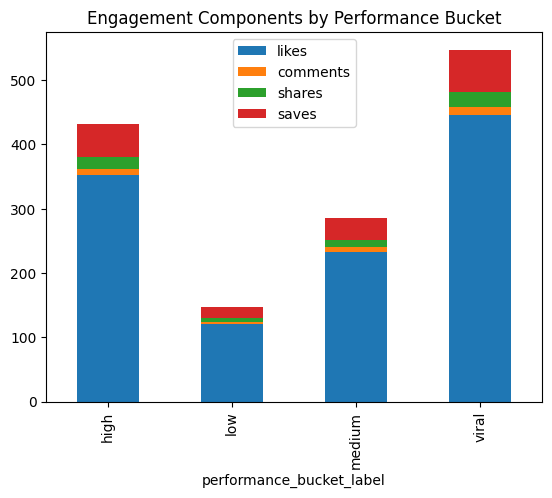

In [226]:
engagement_means = df.groupby('performance_bucket_label')[['likes','comments','shares','saves']].mean()
engagement_means.plot(kind='bar', stacked=True)
plt.title('Engagement Components by Performance Bucket')
plt.show()


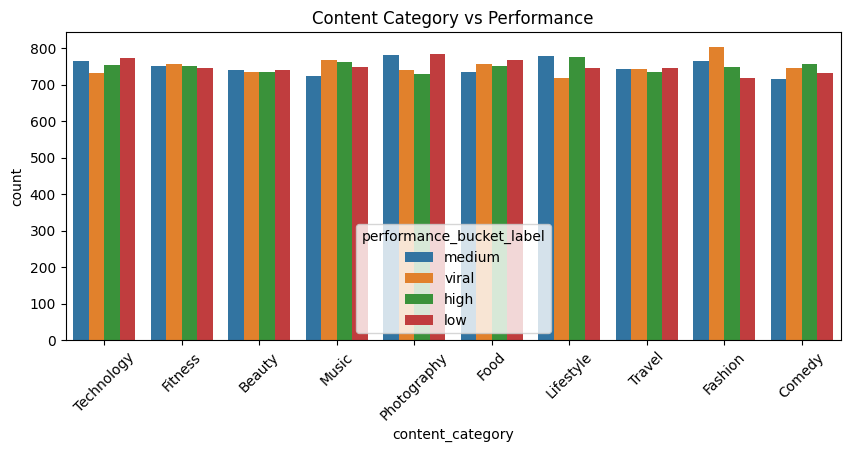

In [227]:
plt.figure(figsize=(10,4))
sns.countplot(x='content_category', hue='performance_bucket_label', data=df)
plt.xticks(rotation=45)
plt.title("Content Category vs Performance")
plt.show()


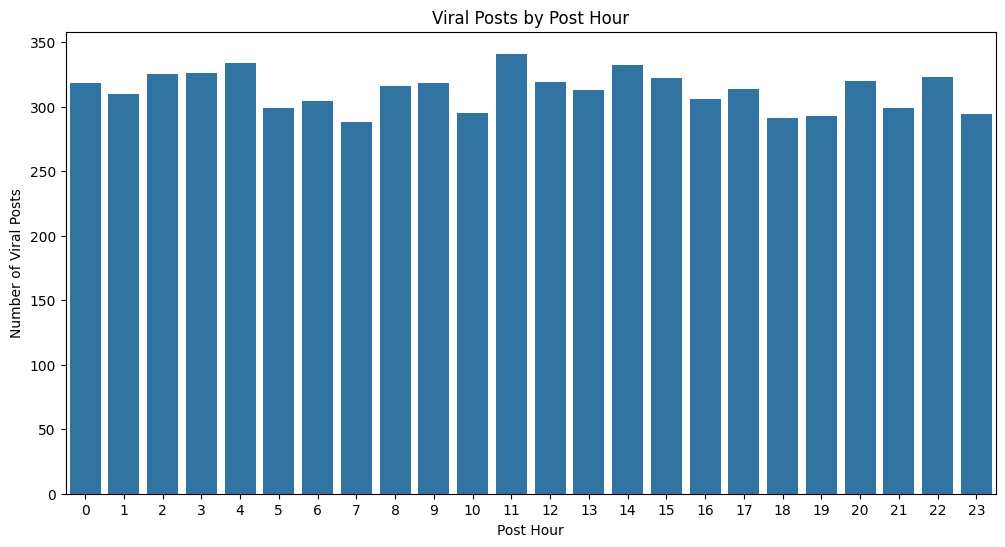

In [228]:

viral_df = df[df['performance_bucket_label'] == 'viral']


viral_counts = viral_df['post_hour'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=viral_counts.index, y=viral_counts.values)

plt.title("Viral Posts by Post Hour")
plt.xlabel("Post Hour")
plt.ylabel("Number of Viral Posts")
plt.xticks(range(24))
plt.show()


In [229]:
df.columns

Index(['account_type', 'follower_count', 'media_type', 'content_category',
       'traffic_source', 'has_call_to_action', 'post_hour', 'day_of_week',
       'likes', 'comments', 'shares', 'saves', 'reach', 'impressions',
       'engagement_rate', 'followers_gained', 'caption_length',
       'hashtags_count', 'performance_bucket_label'],
      dtype='object')

In [230]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols


(['follower_count',
  'has_call_to_action',
  'post_hour',
  'likes',
  'comments',
  'shares',
  'saves',
  'reach',
  'impressions',
  'engagement_rate',
  'followers_gained',
  'caption_length',
  'hashtags_count'],
 ['account_type',
  'media_type',
  'content_category',
  'traffic_source',
  'day_of_week',
  'performance_bucket_label'])

In [231]:
low_cardinality = [col for col in cat_cols if df[col].nunique() <= 10]
high_cardinality = [col for col in cat_cols if df[col].nunique() > 10]

low_cardinality


['account_type',
 'media_type',
 'content_category',
 'traffic_source',
 'day_of_week',
 'performance_bucket_label']

In [232]:
low_cardinality_cols = [
    'account_type',
    'media_type','content_category',
 'traffic_source',
 'day_of_week'
    
]



In [233]:
high_cardinality

[]

## Encoding Categorical Variables


In [234]:
df = pd.get_dummies(
    df,
    columns=low_cardinality_cols,
    drop_first=True
)



In [235]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['performance_bucket_label']

encoder = OrdinalEncoder(
    categories=[['low', 'medium', 'high', 'viral']],
    dtype=int
)

df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])

df.head()


,follower_count,has_call_to_action,post_hour,likes,comments,shares,saves,reach,impressions,engagement_rate,...,traffic_source_Hashtags,traffic_source_Home Feed,traffic_source_Profile,traffic_source_Reels Feed,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,3551.0,1,6,194,5,7,34,4327,6230,0.0385,...,False,True,False,False,False,True,False,False,False,False
1,31095.0,1,15,449,10,21,68,7451,8268,0.0663,...,True,False,False,False,False,False,False,False,False,False
2,8167.0,0,16,114,2,1,22,1639,2616,0.0531,...,False,False,False,True,False,False,False,True,False,False
3,9044.0,0,3,91,0,7,0,2877,3171,0.0309,...,False,False,False,False,False,False,False,True,False,False
4,15986.0,0,9,154,8,5,21,5350,8503,0.0221,...,False,False,True,False,False,False,False,False,False,False


In [236]:
df_1=df.astype(int)
df_1

,follower_count,has_call_to_action,post_hour,likes,comments,shares,saves,reach,impressions,engagement_rate,...,traffic_source_Hashtags,traffic_source_Home Feed,traffic_source_Profile,traffic_source_Reels Feed,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,3551,1,6,194,5,7,34,4327,6230,0,...,0,1,0,0,0,1,0,0,0,0
1,31095,1,15,449,10,21,68,7451,8268,0,...,1,0,0,0,0,0,0,0,0,0
2,8167,0,16,114,2,1,22,1639,2616,0,...,0,0,0,1,0,0,0,1,0,0
3,9044,0,3,91,0,7,0,2877,3171,0,...,0,0,0,0,0,0,0,1,0,0
4,15986,0,9,154,8,5,21,5350,8503,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,10739,0,10,0,1,2,5,1564,2493,0,...,0,0,0,1,0,0,0,0,0,1
29995,10018,0,15,42,2,1,7,2042,2492,0,...,1,0,0,0,1,0,0,0,0,0
29996,7486,1,10,335,10,16,59,5887,7528,0,...,0,0,0,0,1,0,0,0,0,0
29997,10034,1,19,188,3,0,19,5372,6312,0,...,0,0,0,0,0,1,0,0,0,0


##  Summary

- Less than 10 categories → One-Hot Encoding    
- Target variable → Ordinal Encoding

##  Feature Scaling


In [237]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
dff = scaler.fit_transform(df_1)
dff


array([[-1.11759919,  1.        , -0.54545455, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.48646999,  1.        ,  0.27272727, ...,  0.        ,
         0.        ,  0.        ],
       [-0.17843337,  0.        ,  0.36363636, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.31698881,  1.        , -0.18181818, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20142421,  1.        ,  0.63636364, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43296033,  1.        ,  0.72727273, ...,  0.        ,
         1.        ,  0.        ]], shape=(29999, 37))

In [238]:
dff = pd.DataFrame(
    scaler.fit_transform(df_1),
    columns=df_1.columns,
    index=df_1.index
)
dff

,follower_count,has_call_to_action,post_hour,likes,comments,shares,saves,reach,impressions,engagement_rate,...,traffic_source_Hashtags,traffic_source_Home Feed,traffic_source_Profile,traffic_source_Reels Feed,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,-1.117599,1.0,-0.545455,-0.019305,-0.125,-0.214286,0.128205,-0.121956,-0.055994,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4.486470,1.0,0.272727,0.965251,0.500,0.785714,1.000000,0.528200,0.256654,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.178433,0.0,0.363636,-0.328185,-0.500,-0.642857,-0.179487,-0.681374,-0.610417,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.0,-0.818182,-0.416988,-0.750,-0.214286,-0.743590,-0.423725,-0.525274,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.412411,0.0,-0.272727,-0.173745,0.250,-0.357143,-0.205128,0.090947,0.292705,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0.344863,0.0,-0.181818,-0.768340,-0.625,-0.571429,-0.615385,-0.696982,-0.629286,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
29995,0.198169,0.0,0.272727,-0.606178,-0.500,-0.642857,-0.564103,-0.597503,-0.629439,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29996,-0.316989,1.0,-0.181818,0.525097,0.500,0.428571,0.769231,0.202706,0.143131,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29997,0.201424,1.0,0.636364,-0.042471,-0.375,-0.714286,-0.256410,0.095525,-0.043415,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#   Key Insights 

###  1. Engagement is the Strongest Performance Driver

Likes, comments, shares, and saves directly influence performance bucket.


###  2. Media Type Matters

Certain media types consistently show higher performance.



###  3. Content Strategy Impacts Results

Specific content categories tend to perform better.



###  4. Impressions and Reach are Strongly Correlated

Higher reach results in higher impressions.



###  5. High Engagement Rate = High Performance

Engagement rate is a strong indicator of post success.


###  6. Outliers Represent Viral Content

Extreme values reflect viral posts and justify robust preprocessing techniques.

#  Conclusion

In this project, I performed Exploratory Data Analysis on an Instagram dataset to understand post performance.  
I found that engagement metrics like likes, comments, shares, and saves strongly influence the performance bucket.  
Media type and content category also impact engagement levels.  
I faced challenges in handling missing values, outliers, and choosing proper encoding techniques.  
Overall, this project improved my practical understanding of real-world data analysis.
